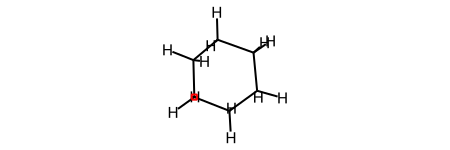

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
name="C1CCCCC1"
mol=Chem.MolFromSmiles(name)
mol=Chem.AddHs(mol)
cids=AllChem.EmbedMultipleConfs(mol, numConfs=10 , randomSeed=1, pruneRmsThresh=0.1, numThreads=0)
mol

In [7]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawMol3D(mol,confId=1)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [3]:
energies=[]
for cid in cids:#構造最適化
    mmff=AllChem.MMFFGetMoleculeForceField(mol, AllChem.MMFFGetMoleculeProperties(mol), confId=cid)#使用する力場
    mmff.Minimize()#MM計算
    energies.append([mmff.CalcEnergy(), cid])#計算した配座、エネルギーをenergyリストに追加
energies

[[-3.560933542913406, 0], [2.3688122496560027, 1]]